<a href="https://colab.research.google.com/github/SachinSharma-2003/Oil_Spill_Detection-/blob/main/ProjectEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

os.makedirs("dataset/images/train", exist_ok=True)
os.makedirs("dataset/images/val", exist_ok=True)
os.makedirs("dataset/masks/train", exist_ok=True)
os.makedirs("dataset/masks/val", exist_ok=True)

print("Folders created successfully")

Folders created successfully


In [ ]:
import os

print(os.listdir('.'))


['.config', 'unet_oil_spill_model.h5', 'dataset', 'processed', 'drive', 'sample_data']


In [ ]:
import os
for f in os.listdir('.'):
    print(f, os.path.getsize(f))


.config 4096
unet_oil_spill_model.h5 93509224
dataset 4096
processed 4096
drive 4096
sample_data 4096


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Extract the dataset


In [ ]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/images.zip", "r") as z:
    z.extractall("/content/dataset")

with zipfile.ZipFile("/content/drive/MyDrive/masks.zip", "r") as z:
    z.extractall("/content/dataset")


In [ ]:
import os

for root, dirs, files in os.walk("/content/dataset"):
    print(root, "->", len(files), "files")


/content/dataset -> 0 files
/content/dataset/images -> 1 files
/content/dataset/images/train -> 6455 files
/content/dataset/images/val -> 1615 files
/content/dataset/masks -> 1 files
/content/dataset/masks/train -> 6455 files
/content/dataset/masks/val -> 1615 files
/content/dataset/__MACOSX -> 2 files
/content/dataset/__MACOSX/images -> 3 files
/content/dataset/__MACOSX/images/train -> 6455 files
/content/dataset/__MACOSX/images/val -> 1615 files
/content/dataset/__MACOSX/masks -> 3 files
/content/dataset/__MACOSX/masks/train -> 6455 files
/content/dataset/__MACOSX/masks/val -> 1615 files


In [ ]:
import shutil

shutil.rmtree("/content/dataset/__MACOSX", ignore_errors=True)

print("Removed __MACOSX folder successfully!")


Removed __MACOSX folder successfully!


In [ ]:
import os

for root, dirs, files in os.walk("/content/dataset"):
    print(root, "->", len(files), "files")


/content/dataset -> 0 files
/content/dataset/images -> 1 files
/content/dataset/images/train -> 6455 files
/content/dataset/images/val -> 1615 files
/content/dataset/masks -> 1 files
/content/dataset/masks/train -> 6455 files
/content/dataset/masks/val -> 1615 files


In [ ]:
import os

removed = 0
for root, dirs, files in os.walk("/content/dataset"):
    for f in files:
        if f == ".DS_Store":
            os.remove(os.path.join(root, f))
            removed += 1

print("Removed .DS_Store:", removed)


Removed .DS_Store: 2


In [ ]:
from glob import glob

train_images = sorted(glob("/content/dataset/images/train/*.png"))
val_images   = sorted(glob("/content/dataset/images/val/*.png"))

train_masks  = sorted(glob("/content/dataset/masks/train/*.png"))
val_masks    = sorted(glob("/content/dataset/masks/val/*.png"))

print("Train Images:", len(train_images))
print("Train Masks :", len(train_masks))
print("Val Images  :", len(val_images))
print("Val Masks   :", len(val_masks))


Train Images: 6455
Train Masks : 6455
Val Images  : 1615
Val Masks   : 1615


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import random


In [ ]:
train_images = sorted(glob("/content/dataset/images/train/*.png"))
train_masks  = sorted(glob("/content/dataset/masks/train/*.png"))

val_images   = sorted(glob("/content/dataset/images/val/*.png"))
val_masks    = sorted(glob("/content/dataset/masks/val/*.png"))

print("Train Images:", len(train_images))
print("Train Masks :", len(train_masks))
print("Val Images  :", len(val_images))
print("Val Masks   :", len(val_masks))


Train Images: 6455
Train Masks : 6455
Val Images  : 1615
Val Masks   : 1615


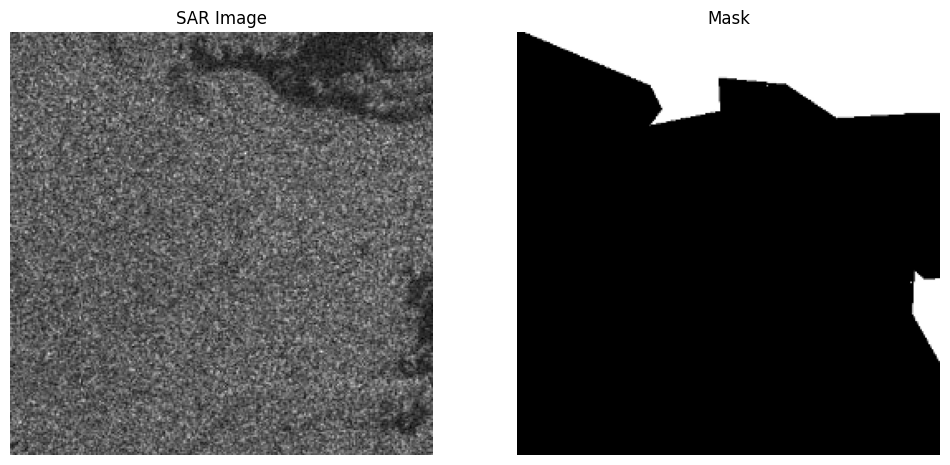

In [ ]:
idx = random.randint(0, len(train_images)-1)

img  = cv2.imread(train_images[idx], 0)
mask = cv2.imread(train_masks[idx], 0)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("SAR Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis('off')

plt.show()


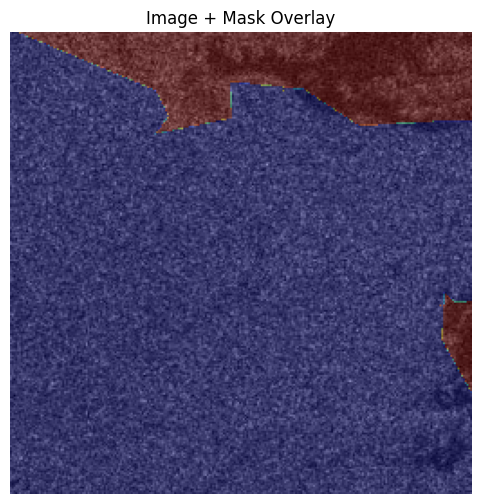

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.imshow(mask, cmap='jet', alpha=0.4)
plt.title("Image + Mask Overlay")
plt.axis('off')
plt.show()


In [ ]:
print("Image Min :", img.min())
print("Image Max :", img.max())
print("Image Mean:", img.mean())


Image Min : 1
Image Max : 101
Image Mean: 37.32524108886719


In [ ]:
print("Mask unique values:", np.unique(mask))


Mask unique values: [  0   1   2   3   8   9  10  12  13  14  15  17  18  20  21  25  26  28
  29  31  32  34  35  37  39  41  42  43  44  46  48  52  53  60  61  67
  72  73  74  75  76  78  81  84  87  88  89  94  95  96  98 102 103 105
 109 110 118 120 121 123 130 131 132 137 138 139 140 144 145 146 152 157
 159 160 161 164 168 171 174 177 179 180 181 183 184 188 192 194 198 199
 201 202 204 207 208 209 210 211 213 214 216 218 221 222 224 225 227 229
 230 232 234 237 238 241 242 243 246 247 248 249 250 252 253 254 255]


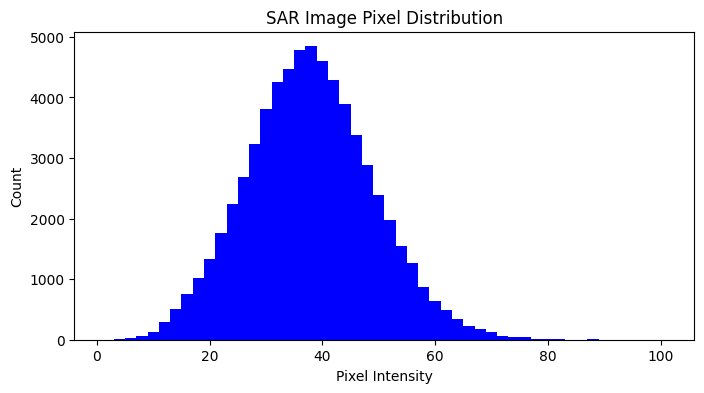

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(img.ravel(), bins=50, color='blue')
plt.title("SAR Image Pixel Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.show()


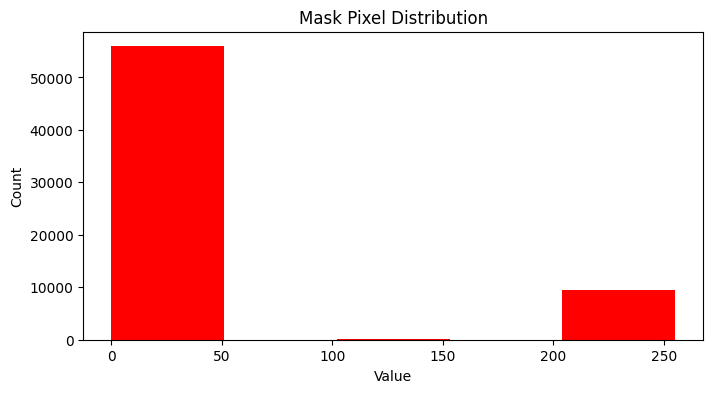

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(mask.ravel(), bins=5, color='red')
plt.title("Mask Pixel Distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()


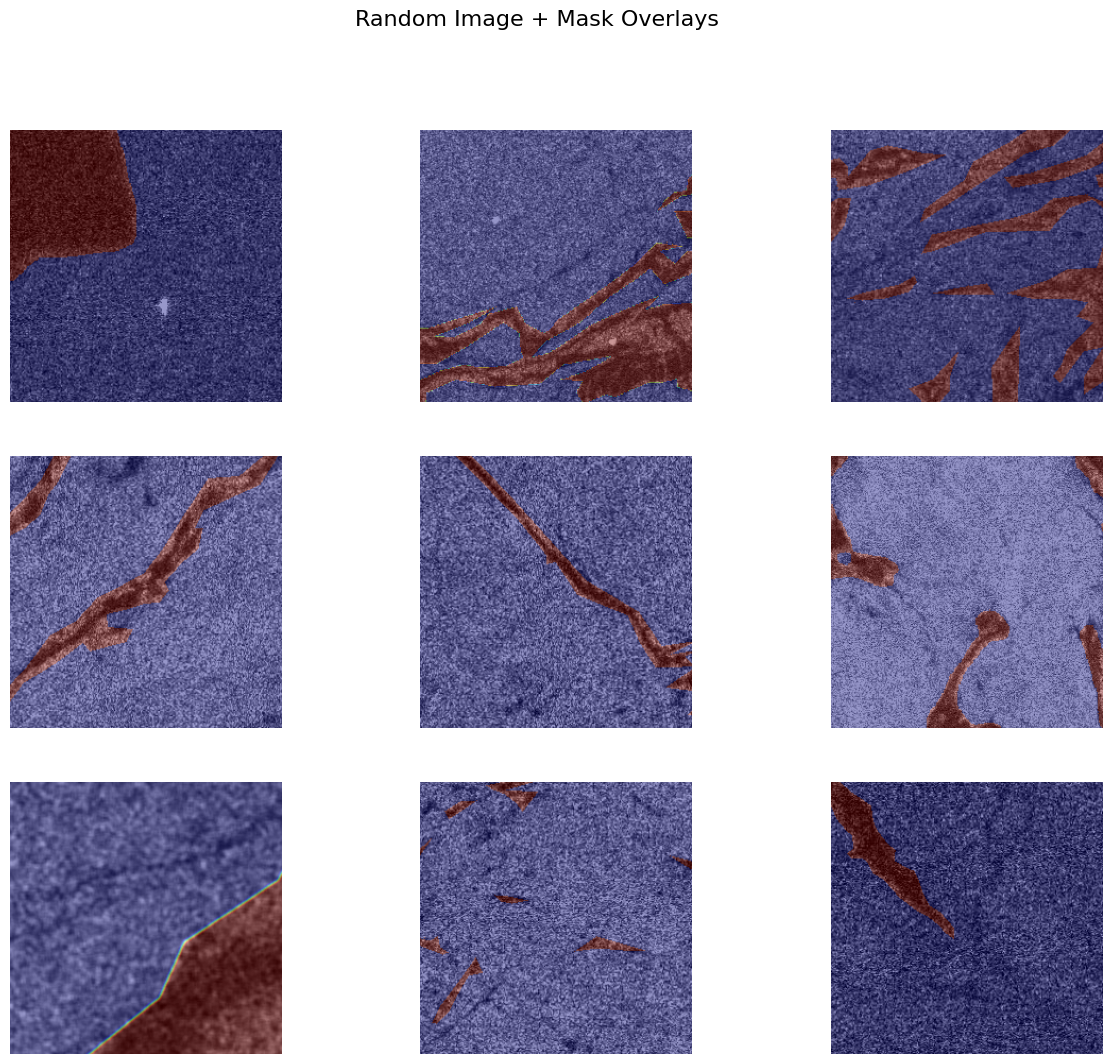

In [ ]:
plt.figure(figsize=(15,12))

for i in range(9):
    idx = random.randint(0, len(train_images)-1)

    img  = cv2.imread(train_images[idx], 0)
    mask = cv2.imread(train_masks[idx], 0)

    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap='gray')
    plt.imshow(mask, cmap='jet', alpha=0.4)
    plt.axis('off')

plt.suptitle("Random Image + Mask Overlays", fontsize=16)
plt.show()


In [ ]:
print("Training image shape:", img.shape)


Training image shape: (256, 256)


In [ ]:
total_oil_pixels = 0
total_pixels = 0

for m in train_masks:
    mask = cv2.imread(m, 0)
    total_oil_pixels += np.sum(mask > 0)
    total_pixels += mask.size

oil_percentage = (total_oil_pixels / total_pixels) * 100
print(f"Oil Pixel Percentage in Training Masks: {oil_percentage:.4f}%")


Oil Pixel Percentage in Training Masks: 25.6900%


In [ ]:
print("Training samples:", len(train_images))
print("Validation samples:", len(val_images))


Training samples: 6455
Validation samples: 1615


In [ ]:
import cv2
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
train_images = sorted(glob("/content/dataset/images/train/*.png"))
train_masks  = sorted(glob("/content/dataset/masks/train/*.png"))

print("Loaded", len(train_images), "train images")
print("Loaded", len(train_masks),  "train masks")


Loaded 6455 train images
Loaded 6455 train masks


In [ ]:
os.makedirs("/content/processed/train/images", exist_ok=True)
os.makedirs("/content/processed/train/masks", exist_ok=True)

os.makedirs("/content/processed/val/images", exist_ok=True)
os.makedirs("/content/processed/val/masks", exist_ok=True)


In [ ]:
IMG_SIZE = 256  # recommended for U-Net

def preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # 1. Remove speckle noise (SAR)
    img = cv2.medianBlur(img, 3)

    # 2. Resize
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    # 3. Normalize (0-1)
    img = img / 255.0

    return img

def preprocess_mask(path):
    mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # 1. Resize
    mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))

    # 2. Binarize mask (0 or 1)
    mask = (mask > 0).astype(np.uint8)

    return mask


In [ ]:
for img_path, mask_path in zip(train_images, train_masks):
    img = preprocess_image(img_path)
    mask = preprocess_mask(mask_path)

    # save preprocessed outputs
    img_name = os.path.basename(img_path)
    mask_name = os.path.basename(mask_path)

    np.save(f"/content/processed/train/images/{img_name}.npy", img)
    np.save(f"/content/processed/train/masks/{mask_name}.npy", mask)


In [ ]:
for img_path, mask_path in zip(val_images, val_masks):
    img = preprocess_image(img_path)
    mask = preprocess_mask(mask_path)

    img_name = os.path.basename(img_path)
    mask_name = os.path.basename(mask_path)

    np.save(f"/content/processed/val/images/{img_name}.npy", img)
    np.save(f"/content/processed/val/masks/{mask_name}.npy", mask)


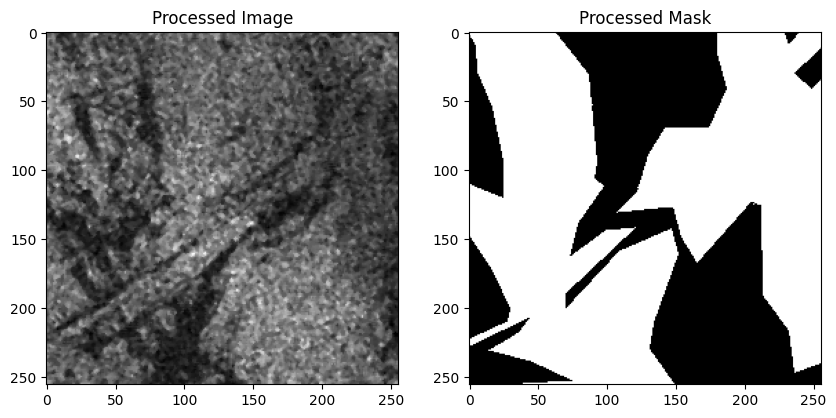

In [ ]:
import random

sample = random.choice(glob("/content/processed/train/images/*.npy"))

img = np.load(sample)
mask = np.load(sample.replace("images", "masks"))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Processed Image")

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')
plt.title("Processed Mask")

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import numpy as np
from glob import glob


In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
# Load training data
X_train = np.array([np.load(p) for p in sorted(glob("/content/processed/train/images/*.npy"))])
y_train = np.array([np.load(p) for p in sorted(glob("/content/processed/train/masks/*.npy"))])

# Load validation data
X_val = np.array([np.load(p) for p in sorted(glob("/content/processed/val/images/*.npy"))])
y_val = np.array([np.load(p) for p in sorted(glob("/content/processed/val/masks/*.npy"))])

print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape, y_val.shape)

Train: (6455, 256, 256) (6455, 256, 256)
Val  : (1615, 256, 256) (1615, 256, 256)


In [ ]:
X_train = X_train[..., np.newaxis]
X_val   = X_val[..., np.newaxis]

y_train = y_train[..., np.newaxis]
y_val   = y_val[..., np.newaxis]

print(X_train.shape, y_train.shape)

(6455, 256, 256, 1) (6455, 256, 256, 1)


In [ ]:
# 1️⃣ Enable mixed precision FIRST
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# 2️⃣ Then define the U-Net model
from tensorflow.keras import layers, models

def unet_model(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D()(c1)

    c2 = layers.Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D()(c2)

    c3 = layers.Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, 3, activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D()(c3)

    # Bottleneck
    c4 = layers.Conv2D(512, 3, activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, 3, activation='relu', padding='same')(c4)

    # Decoder
    u5 = layers.UpSampling2D()(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = layers.Conv2D(256, 3, activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(256, 3, activation='relu', padding='same')(c5)

    u6 = layers.UpSampling2D()(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(128, 3, activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(128, 3, activation='relu', padding='same')(c6)

    u7 = layers.UpSampling2D()(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(64, 3, activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(64, 3, activation='relu', padding='same')(c7)

    # 🔴 Output must be float32
    outputs = layers.Conv2D(
        1, 1, activation='sigmoid', dtype='float32'
    )(c7)

    model = models.Model(inputs, outputs)
    return model

# 3️⃣ Then compile the model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model = unet_model()
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=BinaryCrossentropy(),
    metrics=["accuracy"]
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 64, 64,    │          0 │ conv2d_7[0][0]    │
│ (UpSampling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64, 64,    │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │ 768)              │            │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 64, 64,    │  1,769,728 │ concatenate[0][0] │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_8[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 128, 128,  │          0 │ conv2d_9[0][0]  

 Total params: 7,781,761 (29.69 MB)

 Trainable params: 7,781,761 (29.69 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
loss = BinaryCrossentropy()

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
X_train_small = X_train[:500]
y_train_small = y_train[:500]

X_val_small = X_val[:100]
y_val_small = y_val[:100]

In [ ]:
history = model.fit(
    X_train_small, y_train_small,
    validation_data=(X_val_small, y_val_small),
    epochs=2,
    batch_size=8
)

Epoch 1/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 122s 827ms/step - accuracy: 0.8372 - loss: 0.4807 - val_accuracy: 0.8327 - val_loss: 0.3086
Epoch 2/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.8561 - loss: 0.2986 - val_accuracy: 0.9100 - val_loss: 0.2416


In [ ]:
model.save("/content/unet_oil_spill_model.h5")
print("Model saved successfully!")

Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


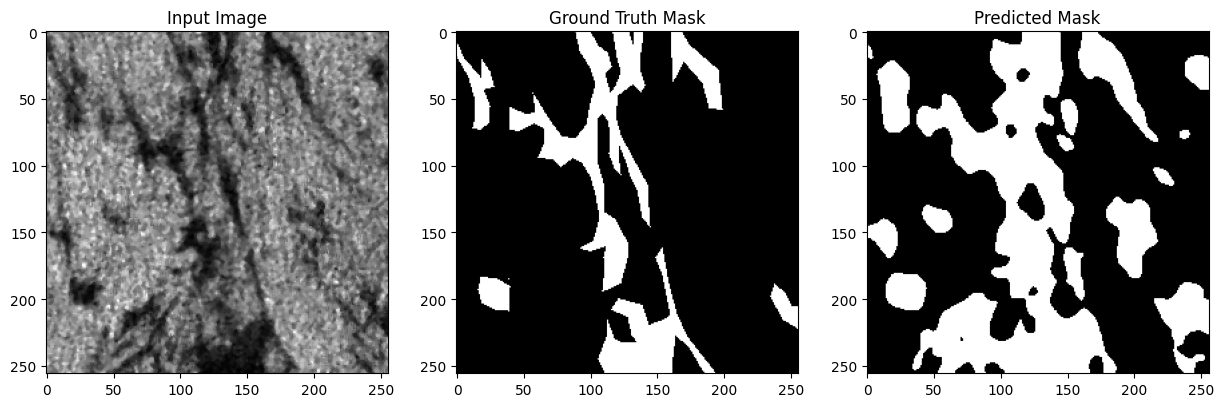

In [ ]:
import matplotlib.pyplot as plt
import random

idx = random.randint(0, len(X_val)-1)

pred = model.predict(X_val[idx:idx+1])[0]

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(X_val[idx].squeeze(), cmap='gray')
plt.title("Input Image")

plt.subplot(1,3,2)
plt.imshow(y_val[idx].squeeze(), cmap='gray')
plt.title("Ground Truth Mask")

plt.subplot(1,3,3)
plt.imshow(pred.squeeze() > 0.5, cmap='gray')
plt.title("Predicted Mask")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


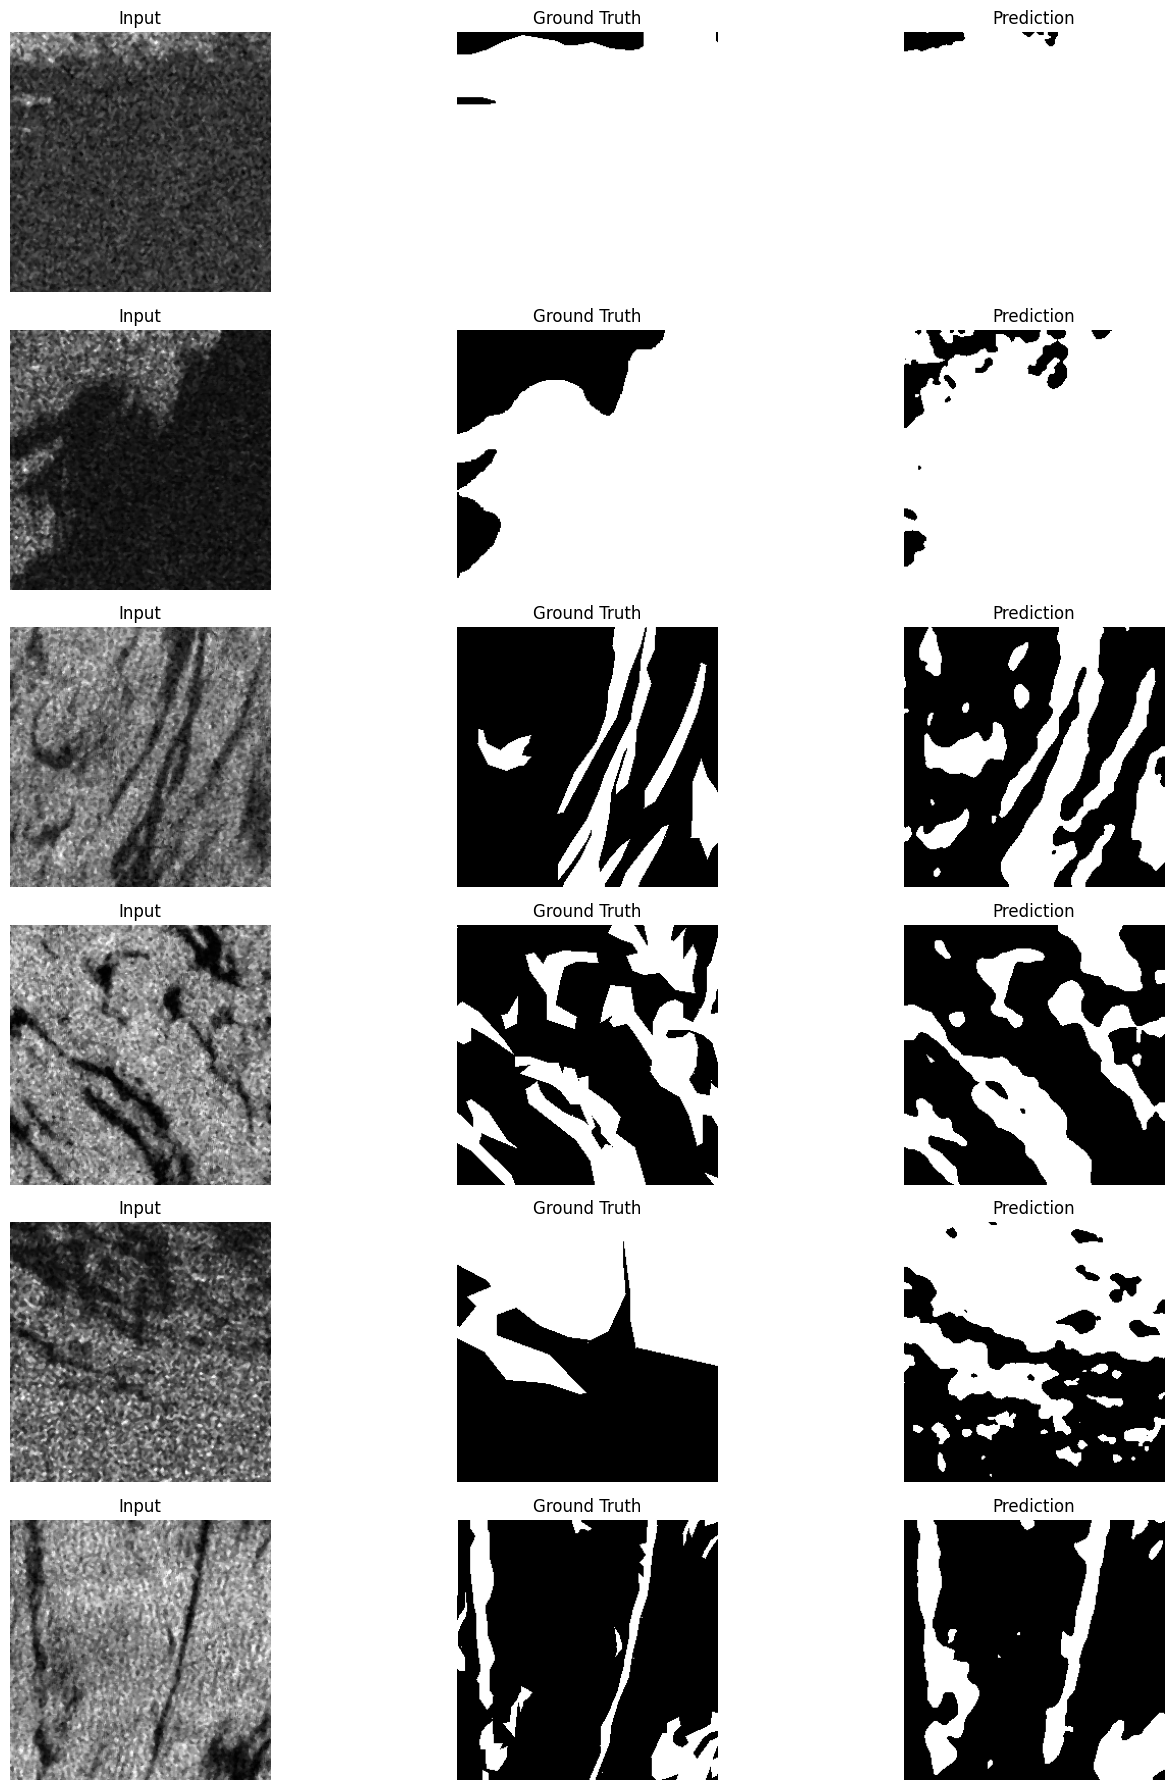

In [ ]:
import matplotlib.pyplot as plt
import random

num_samples = 6
indices = random.sample(range(len(X_val)), num_samples)

plt.figure(figsize=(15, num_samples * 3))

for i, idx in enumerate(indices):
    pred = model.predict(X_val[idx:idx+1])[0]

    plt.subplot(num_samples, 3, i*3 + 1)
    plt.imshow(X_val[idx].squeeze(), cmap='gray')
    plt.title("Input")
    plt.axis("off")

    plt.subplot(num_samples, 3, i*3 + 2)
    plt.imshow(y_val[idx].squeeze(), cmap='gray')
    plt.title("Ground Truth")
    plt.axis("off")

    plt.subplot(num_samples, 3, i*3 + 3)
    plt.imshow(pred.squeeze() > 0.5, cmap='gray')
    plt.title("Prediction")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

def dice_score(y_true, y_pred, threshold=0.5):
    y_pred = (y_pred > threshold).astype(np.uint8)
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred) + 1e-6)

def iou_score(y_true, y_pred, threshold=0.5):
    y_pred = (y_pred > threshold).astype(np.uint8)
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return intersection / (union + 1e-6)

dice_scores = []
iou_scores = []

for i in range(100):  # evaluate on 100 val images
    pred = model.predict(X_val[i:i+1])[0]
    dice_scores.append(dice_score(y_val[i], pred))
    iou_scores.append(iou_score(y_val[i], pred))

print("Mean Dice:", np.mean(dice_scores))
print("Mean IoU :", np.mean(iou_scores))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

In [ ]:
for t in [0.3, 0.5]:
    dice_vals = []
    for i in range(50):
        pred = model.predict(X_val[i:i+1])[0]
        dice_vals.append(dice_score(y_val[i], pred, threshold=t))
    print(f"Threshold {t} → Mean Dice:", np.mean(dice_vals))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=8,
    batch_size=16,
    verbose=1
)
